In [ ]:
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#NOTE: Most items in '' refer to files/external items --- not local variables

train_df = pd.read_csv('train.csv', header=0)

print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")

train_df.head(5)


Number of samples: 1460 and number of features: 81 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
bedrooms = np.unique(train_df['BedroomAbvGr'])

#prints the unique number of above ground bedrooms
#ignored below ground bedrooms
print("bedrooms:",bedrooms)


bedrooms: [0 1 2 3 4 5 6 8]


Text(0.5,1,'Title')

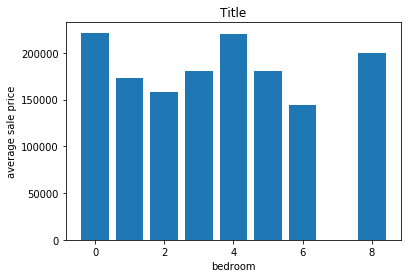

In [5]:
#calculates mean price per bedroom for each item in in the set
#sets cannot store duplicates, iterating through set calculates mean and can be indexed

bedrooms_mean = {}
for i in bedrooms:
    temp_df = train_df.loc[train_df['BedroomAbvGr'] == i]
    bedrooms_mean[i] = temp_df['SalePrice'].mean()
    
#Plots the prices. Expect more bedrooms to be more expensive

plt.bar(bedrooms,[bedrooms_mean[i] for i in bedrooms])
plt.xlabel("bedroom")
plt.ylabel("average sale price")
plt.title("Title")

In [6]:
#graph looked different, verify this difference.

quality: [ 1  2  3  4  5  6  7  8  9 10]


Text(0.5,1,'Title')

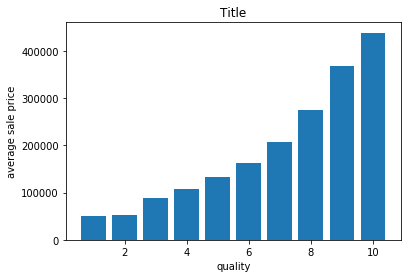

In [7]:
#attempt 2: grouping by overall condition, on scale of 1-10 w/ 10 as high

#NOTE: Code is same from above meaning local variables are overwritten. See code description above for more info.

quality = np.unique(train_df['OverallQual'])
print("quality:",quality)

quality_mean = {}
for i in quality:
    temp_df = train_df.loc[train_df['OverallQual'] == i]
    quality_mean[i] = temp_df['SalePrice'].mean()
   
#expect to see houses in better condition for selilng for more money

plt.bar(quality,[quality_mean[i] for i in quality])
plt.xlabel("quality")
plt.ylabel("average sale price")
plt.title("Title")

In [8]:
#Results were as expected

items: [1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Title')

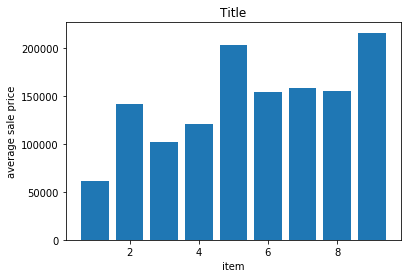

In [9]:
#Code below is is generic to quickly plot one column

#Must use '' in definining string
dataColumn = 'OverallCond'

item = np.unique(train_df[dataColumn])
print("items:", item)

item_mean = {}
for i in item:
    temp_df = train_df.loc[train_df[dataColumn] == i]
    item_mean[i] = temp_df['SalePrice'].mean()
   

plt.bar(item,[item_mean[i] for i in item])
plt.xlabel("item")
plt.ylabel("average sale price")
plt.title("Title")

In [10]:
# pick your features
cols = ['OverallQual','OverallCond']
# try more features later.


# pick your model (you should consider adjusting optional parameters too)
# reading in a few models we can pick from (there are many others)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

# pick one by commenting/uncommenting
model = DecisionTreeRegressor()
#model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors = 5)
#model = svm.LinearSVR()
#model = RandomForestRegressor(n_estimators = 1)

print("columns selected for later:",cols)
print(model) # to get an idea of parameters and confirm model chosen

columns selected for later: ['OverallQual', 'OverallCond']
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [11]:
# this is a way of splitting training and testing by hand
# however, there are tools to do this automatically
# google "cross validation" for a better/more advanced strategy
#--------------------

n = len(train_df) # get number of rows in the training set
training_size = 0.75 # fraction of training data to split off for internal testing

# set up separate training and testing sets
# in this case using shuffled array indices
# there are many more ways to do this too
indices = np.array(range(n)) # makes an array of row indices in order
from numpy.random import shuffle
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]

# now use those shuffled indices to separating training from test dataframes
new_train_df = train_df.iloc[mytrain_i]
new_test_df = train_df.iloc[mytest_i]

print("samples in the new training subset:",len(new_train_df))
print("samples in the new test subset:",len(new_test_df))

samples in the new training subset: 1095
samples in the new test subset: 365


In [12]:
# fit the model to the training subset of original training data
model.fit(new_train_df[cols], new_train_df['SalePrice'])

# predict on the testing subset of the original training data
pred_count = model.predict(new_test_df[cols])

# score the model on the new test set
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(new_test_df['SalePrice'],pred_count))
print("RMS error:",rms)

RMS error: 45076.46992776416


In [13]:
# read in the test data
# this is 
test_df = pd.read_csv('test.csv', header=0)
print("\nNumber of samples:",test_df.shape[0] ,"and number of features:",test_df.shape[1],"\n")

# show the test data output to be sure it read in correctly and added the column
test_df.head()

# fit the selected model TO YOUR FULL TRAINING SET
model.fit(train_df[cols], train_df['SalePrice'])

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS
# (not the "test set" you used for model selection and tuning)
pred_count = model.predict(test_df[cols])

# add the prediction column (in case you want to inspect it later)
test_df['SalePrice'] = pred_count


# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['Id','SalePrice']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv")


Number of samples: 1459 and number of features: 80 

Prediction complete. Saved as my_prediction.csv
